## Import libraries and fingering maps

In [1]:
from abjad import *
%load_ext abjad.ext.ipython
%cd /Users/josephdavancens/git/dissertation
from dissertation import *
%cd /Users/josephdavancens/git/dissertation/dissertation/materials/woodwindfingerings/clarinet
from alternate_fingering_map import alternate_fingering_map
from basic_fingering_map import basic_fingering_map
from multiphonic_fingering_map import multiphonic_fingering_map

/Users/josephdavancens/git/dissertation
/Users/josephdavancens/git/dissertation/dissertation/materials/woodwindfingerings/clarinet


## Put fingering maps in a list sorted by lowest partial

In [2]:
all_fingerings = list()
for k, v in basic_fingering_map.items():
    vector = [[k],v]
    all_fingerings.append(vector)
for k, v in alternate_fingering_map.items():
    vector = [[k],v]
    all_fingerings.append(vector)
for k, v in multiphonic_fingering_map.items():
    vector = [sorted(k),v]
    all_fingerings.append(vector)    

In [3]:
all_fingerings = sorted(all_fingerings, key=lambda f: f[0])
all_combis = []
for x in all_fingerings:
    combi = actions.WoodwindFingeringCombination(
        instrument=instrumenttools.ClarinetInBFlat(),
        left=x[1][0],
        right=x[1][1],
        predicted_pitches=x[0]
    )
    all_combis.append(combi)

## Show all fingerings that produce either B3, B4, B5 or B6 partials (written)

In [14]:
b_partials = [x for x in all_combis if \
              pitchtools.NamedPitch("b") in x.predicted_pitches or \
              pitchtools.NamedPitch("b'") in x.predicted_pitches or \
              pitchtools.NamedPitch("b''") in x.predicted_pitches or \
              pitchtools.NamedPitch("b'''") in x.predicted_pitches]

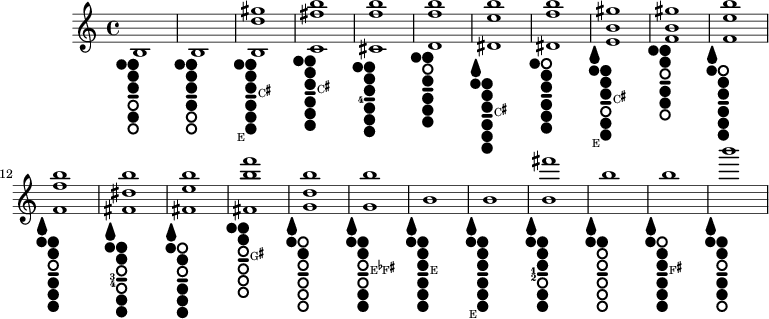

In [15]:
chords = []
for fingering_combination in b_partials: 
    chord = fingering_combination.markup(size=0.67, graphical=False)
    chords.append(chord)
staff = Staff(chords)
show(staff)

## Show all fingerings that produce either A3, A4, A5 or A6 partials (written)

In [19]:
a_partials = [x for x in all_combis if \
              pitchtools.NamedPitch("a") in x.predicted_pitches or \
              pitchtools.NamedPitch("a'") in x.predicted_pitches or \
              pitchtools.NamedPitch("a''") in x.predicted_pitches or \
              pitchtools.NamedPitch("a'''") in x.predicted_pitches]

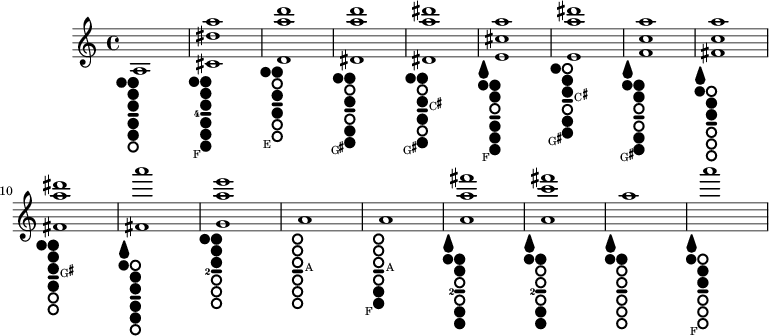

In [20]:
chords = []
for fingering_combination in a_partials: 
    chord = fingering_combination.markup(size=0.67, graphical=False)
    chords.append(chord)
staff = Staff(chords)
show(staff)